### Importação dos dados



In [51]:
import pandas as pd
import matplotlib.pyplot as plt

url_1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url_2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url_3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url_4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja_1 = pd.read_csv(url_1)
loja_2 = pd.read_csv(url_2)
loja_3 = pd.read_csv(url_3)
loja_4 = pd.read_csv(url_4)

lojas = {
    "Loja 1": loja_1,
    "Loja 2": loja_2,
    "Loja 3": loja_3,
    "Loja 4": loja_4
}

# 1. Análise do faturamento



In [52]:
faturamentos = []

for nome_loja, df in lojas.items():
  faturamento = df["Preço"].sum()
  faturamentos.append({
        "Loja": nome_loja,
        "Faturamento Total": faturamento})

df_faturamentos = pd.DataFrame(faturamentos)

print("* Faturamento total por loja *")
print(df_faturamentos)

* Faturamento total por loja *
     Loja  Faturamento Total
0  Loja 1         1534509.12
1  Loja 2         1488459.06
2  Loja 3         1464025.03
3  Loja 4         1384497.58


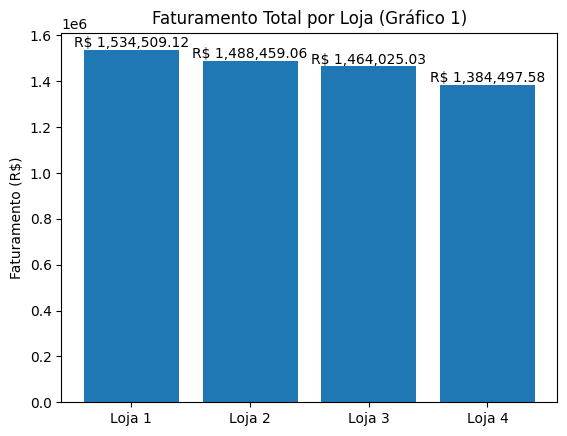

In [53]:
plt.figure()
bars = plt.bar(df_faturamentos["Loja"], df_faturamentos["Faturamento Total"])

plt.title("Faturamento Total por Loja (Gráfico 1)")
plt.ylabel("Faturamento (R$)")

for i, valor in enumerate(df_faturamentos["Faturamento Total"]):
    plt.text(i, valor, f"R$ {valor:,.2f}", ha="center", va="bottom")

plt.show()

# 2. Vendas por Categoria

In [54]:
for nome_loja, df in lojas.items():
  categoria_loja = df["Categoria do Produto"].value_counts().sort_values(ascending=False)
  print(f"\n* Categorias mais vendidas - {nome_loja} *")
  print(categoria_loja)


* Categorias mais vendidas - Loja 1 *
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

* Categorias mais vendidas - Loja 2 *
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

* Categorias mais vendidas - Loja 3 *
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

* Categorias mais vendidas - Loja 4 *
Categor

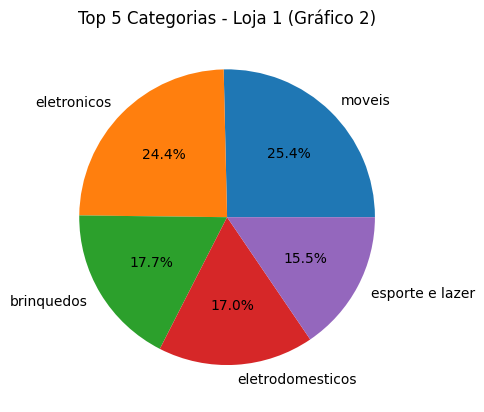

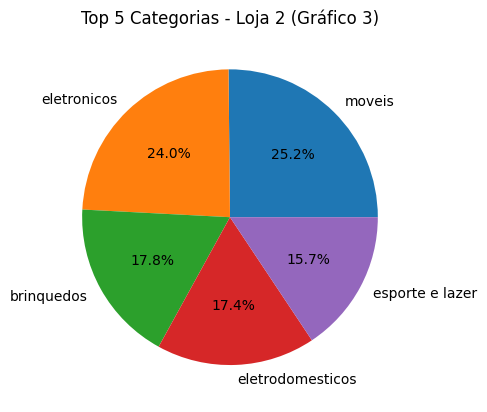

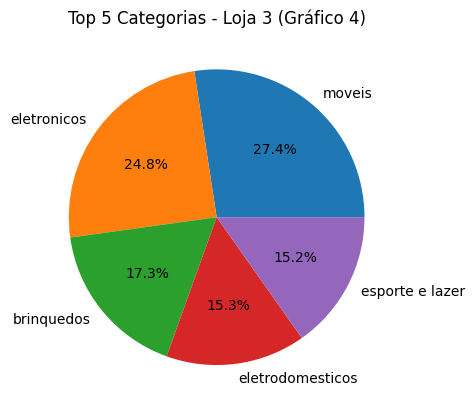

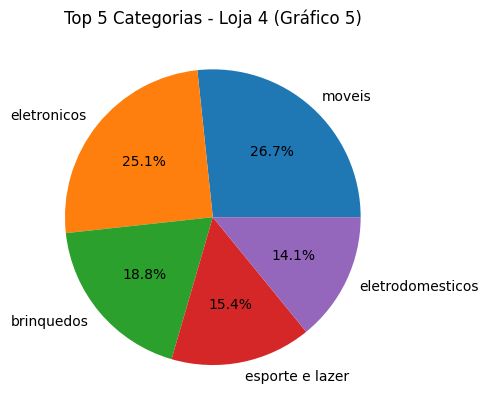

In [55]:
numero_grafico = 2
for nome_loja, df in lojas.items():
    categorias = df["Categoria do Produto"].value_counts().head(5)

    plt.figure()
    plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%')

    plt.title(f"Top 5 Categorias - {nome_loja} (Gráfico {numero_grafico})")

    plt.show()
    numero_grafico += 1

# 3. Média de Avaliação das Lojas


In [56]:
avaliacoes = []

for nome_loja, df in lojas.items():
  avaliacao = df["Avaliação da compra"].mean()
  avaliacoes.append({
        "Loja": nome_loja,
        "Média de Avaliações": avaliacao})

df_avaliacoes = pd.DataFrame(avaliacoes)

print("* Média das avaliações por loja *")
print(df_avaliacoes)

* Média das avaliações por loja *
     Loja  Média de Avaliações
0  Loja 1             3.976685
1  Loja 2             4.037304
2  Loja 3             4.048326
3  Loja 4             3.995759


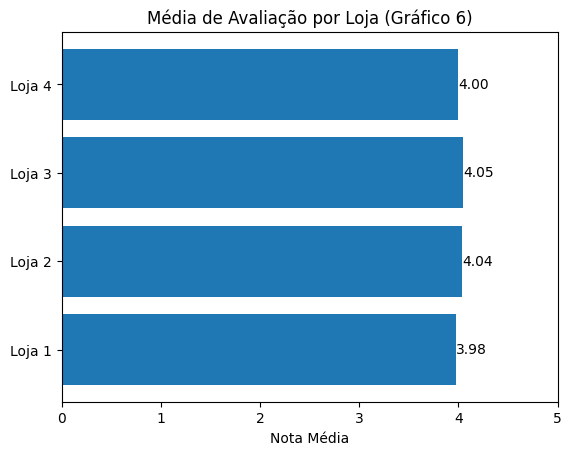

In [57]:
plt.figure()
plt.barh(df_avaliacoes["Loja"], df_avaliacoes["Média de Avaliações"])

plt.title("Média de Avaliação por Loja (Gráfico 6)")
plt.xlabel("Nota Média")
plt.xlim(0, 5)

for i, valor in enumerate(df_avaliacoes["Média de Avaliações"]):
    plt.text(valor, i, f"{valor:.2f}", va="center")

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [58]:
for nome_loja, df in lojas.items():
    vendas_produtos = df["Produto"].value_counts()

    max_vendas = vendas_produtos.max()
    min_vendas = vendas_produtos.min()

    mais_vendidos = vendas_produtos[vendas_produtos == max_vendas]
    menos_vendidos = vendas_produtos[vendas_produtos == min_vendas]

    print(f"\n* {nome_loja} *")
    print(f"\nProdutos mais vendidos ({max_vendas} vendas):")
    print(mais_vendidos)

    print(f"\nProdutos menos vendidos ({min_vendas} vendas):")
    print(menos_vendidos, "\n")


* Loja 1 *

Produtos mais vendidos (60 vendas):
Produto
Micro-ondas      60
TV Led UHD 4K    60
Guarda roupas    60
Name: count, dtype: int64

Produtos menos vendidos (33 vendas):
Produto
Headset         33
Celular ABXY    33
Name: count, dtype: int64 


* Loja 2 *

Produtos mais vendidos (65 vendas):
Produto
Iniciando em programação    65
Name: count, dtype: int64

Produtos menos vendidos (32 vendas):
Produto
Jogo de tabuleiro    32
Name: count, dtype: int64 


* Loja 3 *

Produtos mais vendidos (57 vendas):
Produto
Kit banquetas    57
Name: count, dtype: int64

Produtos menos vendidos (35 vendas):
Produto
Blocos de montar    35
Name: count, dtype: int64 


* Loja 4 *

Produtos mais vendidos (62 vendas):
Produto
Cama box    62
Name: count, dtype: int64

Produtos menos vendidos (33 vendas):
Produto
Guitarra    33
Name: count, dtype: int64 



# 5. Frete Médio por Loja

In [59]:
fretes_medios = []

for nome_loja, df in lojas.items():
  frete_medio = df["Frete"].mean()
  fretes_medios.append({
        "Loja": nome_loja,
        "Frete Médio": frete_medio})

df_fretes_medios = pd.DataFrame(fretes_medios)

print("* Frete médio por loja *")
print(df_fretes_medios)

* Frete médio por loja *
     Loja  Frete Médio
0  Loja 1    34.691805
1  Loja 2    33.621941
2  Loja 3    33.074464
3  Loja 4    31.278997


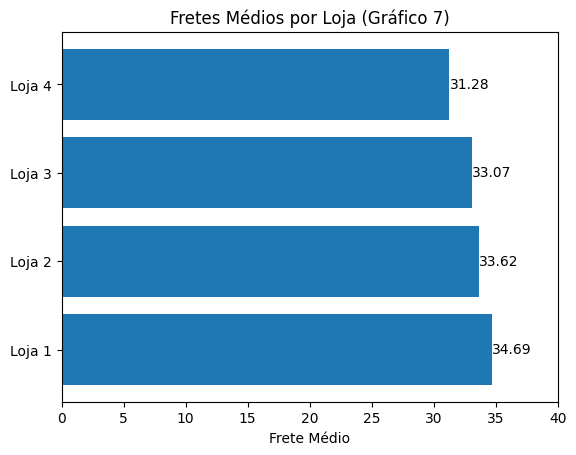

In [60]:
plt.figure()
plt.barh(df_fretes_medios["Loja"], df_fretes_medios["Frete Médio"])

plt.title("Fretes Médios por Loja (Gráfico 7)")
plt.xlabel("Frete Médio")
plt.xlim(0, 40)

for i, valor in enumerate(df_fretes_medios["Frete Médio"]):
    plt.text(valor, i, f"{valor:.2f}", va="center")

plt.show()

# 6. Relação Frete x Avaliação

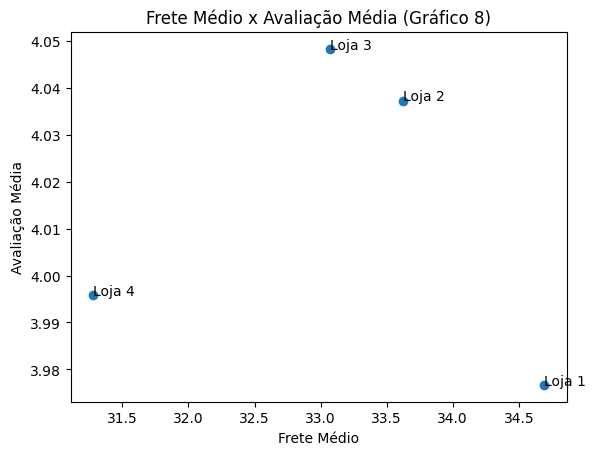

In [61]:
plt.scatter(df_fretes_medios["Frete Médio"], df_avaliacoes["Média de Avaliações"])

for i, loja in enumerate(df_fretes_medios["Loja"]):
    plt.text(df_fretes_medios["Frete Médio"][i],
             df_avaliacoes["Média de Avaliações"][i],
             loja)

plt.xlabel("Frete Médio")
plt.ylabel("Avaliação Média")
plt.title("Frete Médio x Avaliação Média (Gráfico 8)")

plt.show()

# Relatório Final

Prezado Senhor João,

Conforme solicitado, foi realizada uma análise de diversos dados das suas quatro lojas da rede Alura Store. O objetivo dessa análise foi identificar se alguma das lojas possui uma performance inferior às outras, o que poderia indicar a possibilidade de fechamento e venda. Para atingir esse objetivo, os seguintes fatores foram analisados para cada loja: o faturamento total, as categorias de produtos mais vendidas, bem como os produtos mais e menos vendidos, a média das avaliações dos clientes e o frete médio.

A análise do faturamento total indicou que, entre as quatro lojas, a Loja 4 possui um menor desempenho financeiro. A diferença não foi tão discrepante, mas ela se mantém consistentemente abaixo das demais, ficando aproximadamente 150 mil reais atrás da loja com maior faturamento e 80 mil reais atrás da loja com o segundo menor faturamento, o que pode ser observado no Gráfico 1. Esse indicador, sozinho, já posiciona a Loja 4 como a unidade de menor retorno bruto dentro do conjunto que foi analisado.

<img src="https://github.com/leonardo-queiroz/challenge-alura-store/blob/main/images/grafico_1.png?raw=true" alt="Gráfico 1" width="50%" />

Com relação à analise da avaliação média dos clientes, não houve diferença significativa que justifique a manutenção de uma unidade com desempenho inferior em faturamento sob o argumento de maior satisfação do cliente. Como pode ser observado no Gráfico 6, as médias das avaliações das quatro lojas são bem próximas. Um comportamento semelhante foi encontrado na análise do frete médio (Gráfico 7), o valor médio de frete entre as lojas não apresentou variações relevantes. Considerando isso, não foi encontrada nenhuma evidência de que custos logísticos estejam impactando de forma determinante o desempenho comercial de alguma das lojas. Um gráfico especial (Gráfico 8) foi preparado para encontrar uma possível relação entre avaliações mais baixas e valores de frete mais altos, mas, embora a Loja 1 possua a menor média de avaliação e o frete médio mais caro, o mesmo padrão não foi encontrado nas outras lojas.

<img src="https://raw.githubusercontent.com/leonardo-queiroz/challenge-alura-store/refs/heads/main/images/grafico_6.png" alt="Gráfico 6" width="40%" /> <img src="https://raw.githubusercontent.com/leonardo-queiroz/challenge-alura-store/refs/heads/main/images/grafico_7.png" alt="Gráfico 7" width="40%" />

<img src="https://raw.githubusercontent.com/leonardo-queiroz/challenge-alura-store/refs/heads/main/images/grafico_8.png" alt="Gráfico 8" width="50%" />

Por fim, foram analisadas as categorias e produtos mais vendidos de cada loja. O senhor pode ver pelos gráficos de 2 a 5 que as cinco categorias mais vendidas em cada loja demonstram uma forte similaridade entre todas as lojas. As quatro lojas concentram vendas principalmente nas áreas de móveis e eletrônicos, com porcentagem de distribuição bastante semelhante. Não foi identificado diferencial estratégico relevante a nenhuma loja em termos de especialização, nicho ou posicionamento específico. As lojas competem essencialmente com o mesmo portfólio e proposta de valor.

<img src="https://github.com/leonardo-queiroz/challenge-alura-store/blob/main/images/grafico_2.png?raw=true" alt="Gráfico 2" width="40%" /> <img src="https://raw.githubusercontent.com/leonardo-queiroz/challenge-alura-store/refs/heads/main/images/grafico_3.png" alt="Gráfico 3" width="40%" /><img src="https://raw.githubusercontent.com/leonardo-queiroz/challenge-alura-store/refs/heads/main/images/grafico_4.png" alt="Gráfico 4" width="40%" /> <img src="https://raw.githubusercontent.com/leonardo-queiroz/challenge-alura-store/refs/heads/main/images/grafico_5.png" alt="Gráfico 5" width="40%" />

Com base nos dados analisados, conclui-se que a Loja 4 apresenta: o menor faturamento total entre as unidades, desempenho equivalente em avaliação de clientes, estrutura de categorias semelhante às demais lojas, sem diferenciação estratégica e ausência de vantagem competitiva clara dentro da rede. Diante desse cenário, recomenda-se o encerramento da Loja 4, considerando sua menor performance financeira e a redundância operacional em relação às demais unidades. A decisão foi fundamentada exclusivamente nos dados analisados. Caso existam fatores adicionais relevantes, como custos operacionais específicos, contratos de locação ou potencial estratégico de mercado, estes devem ser considerados antes da decisão final.

Estou à disposição caso o senhor tenha alguma duvida ou deseja um aprofundamento da análise.